In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

apy = pd.read_csv("file/apy.csv")
apy

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899


* Mengganti nilai data Production yang bernilai '=' menjadi 0
* Mengganti tipe data di kolom 'Production' menjadi float
* Mengganti tipe data kolom 'Crop_Year' menjadi string

In [156]:
apy['Production'] = apy['Production'].replace(to_replace='=', value= 0)
apy['Production'] = apy['Production'].astype(float)
apy['Crop_Year'] = apy['Crop_Year'].astype(str)
apy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  object 
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  float64
dtypes: float64(2), object(5)
memory usage: 13.1+ MB


In [157]:
all_crop = apy.groupby('Crop').agg({'Production': ['sum', 'mean']})
all_crop['Production'].sort_values(by='sum', ascending = False)

,sum,mean
Crop,,
Coconut,1.299816e+11,6.548193e+07
Sugarcane,5.535682e+09,6.988614e+05
Rice,1.605470e+09,1.062944e+05
Wheat,1.332826e+09,1.687335e+05
Potato,4.248263e+08,6.129366e+04
...,...,...
Other Citrus Fruit,0.000000e+00,0.000000e+00
Cucumber,0.000000e+00,0.000000e+00
Litchi,0.000000e+00,0.000000e+00


**Insight**
* Jumlah produksi terbanyak dari tahun 1997 hingga 2015 yaitu Coconut

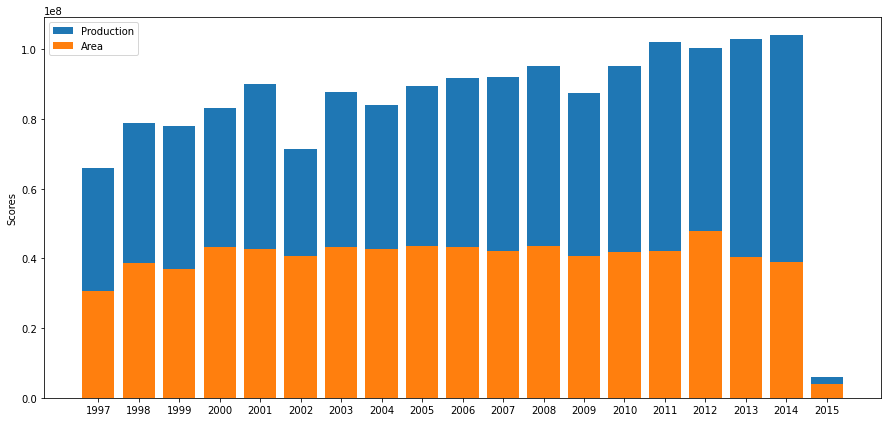

In [158]:
rice = apy.where(apy['Crop'] == 'Rice').dropna()
rice_year = rice.groupby(by=['Crop_Year']).sum()
fig, ax = plt.subplots(figsize = (15,7))
prod = ax.bar(rice_year.index, rice_year['Production'], label = "Production")
area = ax.bar(rice_year.index, rice_year['Area'], label = "Area")
ax.set_ylabel('Scores')
ax.set_title('')
ax.legend()
plt.show()

**Insight**
* Untuk produksi beras setiap tahunnya, relatif memiliki kenaikan produksi, namun pada tahun 2015 produksi peras mengalami penurunan yang signifikan
* Untuk area penanaman beras hampir sama setiap tahunnya, kecuali tahun 2015 yang mengalami penurunan
* Produksi beras terbanyak terjadi pada tahun 2014, dan produksi terendah terjadi pada tahun 2015
* Aea penanaman beras terluas terjadi pada tahun 2012, dan area terkecil pada tahun 2015

In [159]:
crop = apy[apy['Crop'].isin(['Rice','Potato','Wheat'])]
df = crop.groupby('Crop').sum('Production')
df['Production']

Crop
Potato    4.248263e+08
Rice      1.605470e+09
Wheat     1.332826e+09
Name: Production, dtype: float64

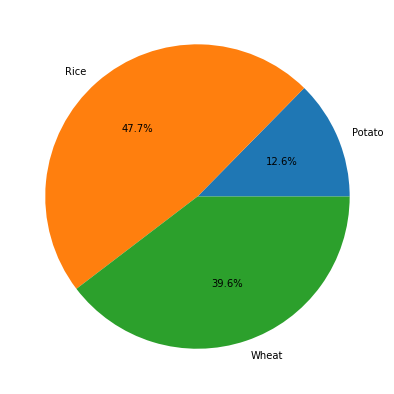

In [160]:

data = df['Production']
fig = plt.figure(figsize=(10,7))
plt.pie(data.values, labels=data.index, autopct='%1.1f%%')
plt.show()


**Insight**
* Antara beras, kentang, dan gandum, beras memiliki tingkat produksi yang lebih banyak

In [161]:
purulia = apy[apy['District_Name'].isin(['PURULIA'])]
purulia_season = purulia.groupby('Season').sum()



C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


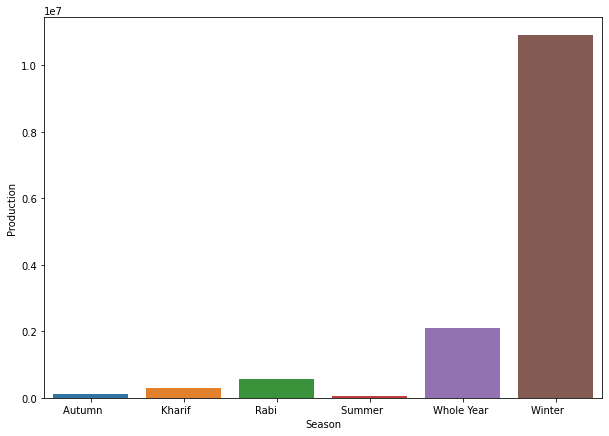

In [162]:
plt.figure(figsize = (10,7))
sns.barplot(purulia_season.index, purulia_season['Production'])
plt.show()

**Insight**
* Di Purulia, produksi terbanyak terjadi pada musim winter
* Dan produksi terkecil terjadi di musim summer

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


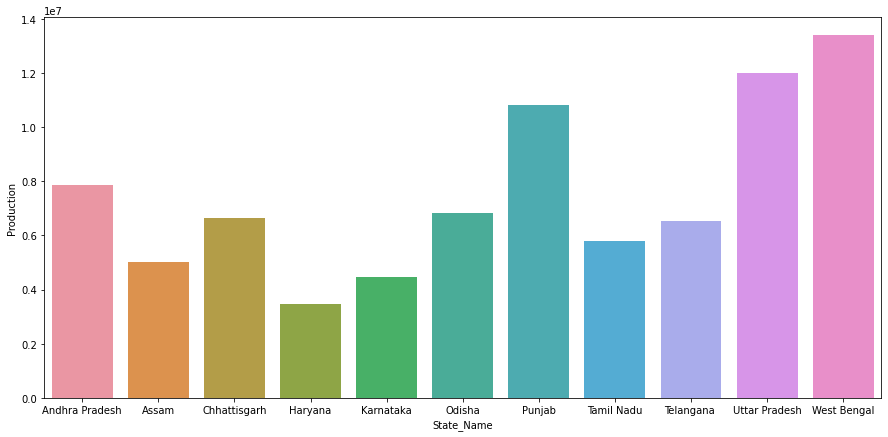

In [227]:
# Mengambil data pada apy pada tahun 2010, dengan crop jenis Rice
rice = apy.loc[(apy['Crop_Year'] == '2010') & (apy['Crop']=='Rice')]
# Mengelompokan data berdasarkan state_name dengan hasil penjumlahan area dan produksi
res = rice.groupby(by='State_Name').sum()
# Mengeliminasi data yang produksinya dibawah rata-rata
data = res.where(res['Production']>=res['Production'].mean()).dropna()

plt.figure(figsize = (15,7))
sns.barplot(data.index, data['Production'])
plt.show()

**Insight**
* Grafik diatas menampilkan produksi beras tahun 2010 yang jumlah produksinya diatas rata-rata
* Pada tahun 2010,produksi beras terbesar terdapat di wilayah West Bengal

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


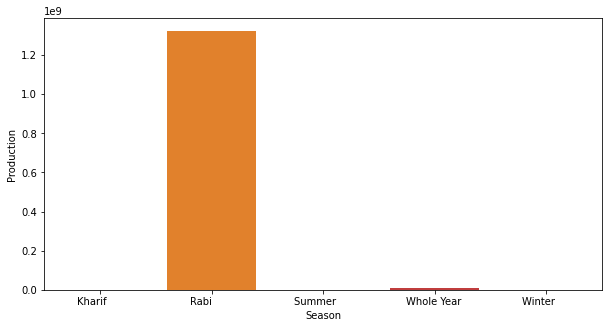

In [242]:
wheat = apy.loc[apy['Crop']=='Wheat']
data = wheat.groupby('Season').sum()
plt.figure(figsize = (10,5))
sns.barplot(data.index, data['Production'])
plt.show()

**Insight**
* Produksi Wheat terbanyak yaitu pada musim Rabi